## Cleaning Dataset

In [4]:
import matplotlib.pyplot as plt

In [3]:
# read dataset
import pandas as pd
import numpy as np
import json
import re

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('TikTok profiles dataset (Public web data).csv')

df.head(20)


Saving TikTok profiles dataset (Public web data).csv to TikTok profiles dataset (Public web data).csv


,timestamp,account_id,nickname,biography,awg_engagement_rate,comment_engagement_rate,like_engagement_rate,bio_link,is_verified,followers,following,likes,videos_count,create_time,id,top_videos,url,profile_pic_url
0,2023-08-01,a.r.m.y664,❤️❤️❤️,nazywam się Basia 🇵🇱+🇺🇸 moja mama jest z USA 🖤...,0.049630,0.004473,0.045157,NaN,False,1755,1443,1586,20,NaN,6794435137251820550,https://www.tiktok.com/@a.r.m.y664/video/68236...,https://www.tiktok.com/@a.r.m.y664,https://p77-sign-va.tiktokcdn.com/musically-ma...
1,2023-08-01,a2_9r,ايمن الفستقي🍺🥂🥃,حسابي الاصلي تيكتككك(_8_ytp_,0.059322,0.004358,0.054964,NaN,False,354,1422,3843,225,NaN,7019722709156430853,https://www.tiktok.com/@a2_9r/video/7218348887...,https://www.tiktok.com/@a2_9r,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...
2,2023-07-30,ti.po.check,All,Активный пользователь ТикТока 🌝\nМеня зовут BD...,0.001399,0.000058,0.001341,NaN,False,1960,243,24000,228,NaN,6826677567140873222,https://www.tiktok.com/@ti.po.check/video/6984...,https://www.tiktok.com/@ti.po.check,https://p58-sign-sg.tiktokcdn.com/aweme/720x72...
3,2023-08-06,nutrifersanort,L.N Fernanda Sánchez,"Nutrióloga, educadora en diabetes.",0.469767,0.004651,0.465116,NaN,False,43,41,100,5,NaN,6809397670235407365,https://www.tiktok.com/@nutrifersanort/video/7...,https://www.tiktok.com/@nutrifersanort,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...
4,2023-07-25,bhgdee,D💲,Ig-bhg.dee📸\nSc-dannieo2099 👻\nFb- frank matth...,0.122283,0.008152,0.114130,NaN,False,276,2262,126,4,NaN,6810526136080483334,https://www.tiktok.com/@bhgdee/video/719722663...,https://www.tiktok.com/@bhgdee,https://p16-sign.tiktokcdn-us.com/tos-useast5-...
5,2023-08-11,preyah_,Preyah,Singer 🎤 Songwriter 📝\nГледай 💎ДИАМАНТ💎 сега 👇🏽,0.008076,0.000048,0.008028,https://youtu.be/jUTqaSMbBoQ,False,108200,385,2000000,462,NaN,6740962431194055686,https://www.tiktok.com/@preyah_/video/72655902...,https://www.tiktok.com/@undefined,https://p16-sign-useast2a.tiktokcdn.com/tos-us...
6,2023-08-11,anastasiaashley,Anastasia Ashley,Pro surfer🏄🏻 \nContact: media@AnastasiaAshley....,0.001783,0.000010,0.001773,NaN,True,871100,268,9000000,688,NaN,6624453226413588485,https://www.tiktok.com/@anastasiaashley/video/...,https://www.tiktok.com/@undefined,https://p16-sign-va.tiktokcdn.com/musically-ma...
7,2023-07-30,_sanek__56rus,Aleks,"КРИТИКА МОИХ НЕДОСТАТКОВ,\nНЕ УМЕНЬШИТ ВАШИ!!!!",0.005706,0.000652,0.005054,NaN,False,3701,2961,1667,75,NaN,6833645355604689925,https://www.tiktok.com/@_sanek__56rus/video/70...,https://www.tiktok.com/@_sanek__56rus,https://p58-sign-sg.tiktokcdn.com/aweme/720x72...
8,2023-07-30,_rinm,noi_29l,ضيفو سنابي👇🏻\nhttps://www.snapchat.com/add/,0.350000,0.025000,0.325000,NaN,False,16,91,26,5,NaN,6967788276582188034,https://www.tiktok.com/@_rinm/video/6993386177...,https://www.tiktok.com/@_rinm,https://p16-sign-sg.tiktokcdn.com/aweme/720x72...
9,2023-07-30,_k_1_ji_ji_e_ip__,_k_1_ji_ji_e_ip__,NaN,0.476190,0.047619,0.428571,https://t.me/wotblitzfreebot?start=2024639240,False,14,116,18,3,NaN,6986183228009907206,https://www.tiktok.com/@_k_1_ji_ji_e_ip__/vide...,https://www.tiktok.com/@_k_1_ji_ji_e_ip__,https://p58-sign-sg.tiktokcdn.com/aweme/720x72...


In [5]:
# 1. clean column name
df_tiktok = df.copy()
df_tiktok.columns = df_tiktok.columns.str.strip().str.lower().str.replace(" ", "_")

# 2. convert timestamp to datetime
df_tiktok["timestamp"] = pd.to_datetime(df_tiktok["timestamp"], errors="coerce")

# 3. handle missing value
df_tiktok["biography"] = df_tiktok["biography"].fillna("")
df_tiktok["bio_link"] = df_tiktok["bio_link"].fillna("")

# create_time is 100% null -> drop
df_tiktok = df_tiktok.drop(columns=["create_time"])

In [6]:
# 4. drop unusual columns
# top_videos is a JSON-like long string, not needed for core analysis
df_tiktok = df_tiktok.drop(columns=["top_videos", "profile_pic_url"], errors="ignore")

# 5. feature engineering
# (A) engagement ratios
df_tiktok["likes_per_video"] = df_tiktok["likes"] / df_tiktok["videos_count"].replace(0, np.nan)
df_tiktok["follow_ratio"] = df_tiktok["followers"] / (df_tiktok["following"] + 1)

# (B) log transforms (avoid skewness)
df_tiktok["followers_log"] = np.log1p(df_tiktok["followers"])
df_tiktok["likes_log"] = np.log1p(df_tiktok["likes"])
df_tiktok["videos_log"] = np.log1p(df_tiktok["videos_count"])

In [7]:
df_tiktok[["awg_engagement_rate",
           "comment_engagement_rate",
           "like_engagement_rate"]].describe()

,awg_engagement_rate,comment_engagement_rate,like_engagement_rate
count,1000.000000,1000.000000,1000.000000
mean,0.562932,0.026569,0.536364
std,3.222055,0.140016,3.159788
min,0.000091,0.000000,0.000000
25%,0.012528,0.000252,0.011791
50%,0.053558,0.001203,0.049653
75%,0.202409,0.006157,0.189987
max,63.375000,2.000000,63.000000


In [8]:
# 6. clean text for NLP
def clean_text_keep_unicode(t):
    t = t.lower()
    t = re.sub(r"http\S+", "", t)
    t = re.sub(r"\s+", " ", t)
    return t.strip()

df_tiktok["biography_clean"] = df_tiktok["biography"].apply(clean_text_keep_unicode)

In [9]:
# check impossible numbers
print((df_tiktok[["followers","following","likes","videos_count"]] < 0).sum())

# 7. remove duplicates
df_tiktok = df_tiktok.drop_duplicates(subset=["account_id"], keep="first")

df_tiktok.head(20)

followers       0
following       0
likes           0
videos_count    0
dtype: int64


,timestamp,account_id,nickname,biography,awg_engagement_rate,comment_engagement_rate,like_engagement_rate,bio_link,is_verified,followers,...,likes,videos_count,id,url,likes_per_video,follow_ratio,followers_log,likes_log,videos_log,biography_clean
0,2023-08-01,a.r.m.y664,❤️❤️❤️,nazywam się Basia 🇵🇱+🇺🇸 moja mama jest z USA 🖤...,0.049630,0.004473,0.045157,,False,1755,...,1586,20,6794435137251820550,https://www.tiktok.com/@a.r.m.y664,79.300000,1.215374,7.470794,7.369601,3.044522,nazywam się basia 🇵🇱+🇺🇸 moja mama jest z usa 🖤...
1,2023-08-01,a2_9r,ايمن الفستقي🍺🥂🥃,حسابي الاصلي تيكتككك(_8_ytp_,0.059322,0.004358,0.054964,,False,354,...,3843,225,7019722709156430853,https://www.tiktok.com/@a2_9r,17.080000,0.248770,5.872118,8.254269,5.420535,حسابي الاصلي تيكتككك(_8_ytp_
2,2023-07-30,ti.po.check,All,Активный пользователь ТикТока 🌝\nМеня зовут BD...,0.001399,0.000058,0.001341,,False,1960,...,24000,228,6826677567140873222,https://www.tiktok.com/@ti.po.check,105.263158,8.032787,7.581210,10.085851,5.433722,активный пользователь тиктока 🌝 меня зовут bdr...
3,2023-08-06,nutrifersanort,L.N Fernanda Sánchez,"Nutrióloga, educadora en diabetes.",0.469767,0.004651,0.465116,,False,43,...,100,5,6809397670235407365,https://www.tiktok.com/@nutrifersanort,20.000000,1.023810,3.784190,4.615121,1.791759,"nutrióloga, educadora en diabetes."
4,2023-07-25,bhgdee,D💲,Ig-bhg.dee📸\nSc-dannieo2099 👻\nFb- frank matth...,0.122283,0.008152,0.114130,,False,276,...,126,4,6810526136080483334,https://www.tiktok.com/@bhgdee,31.500000,0.121962,5.624018,4.844187,1.609438,ig-bhg.dee📸 sc-dannieo2099 👻 fb- frank matthews✔️
5,2023-08-11,preyah_,Preyah,Singer 🎤 Songwriter 📝\nГледай 💎ДИАМАНТ💎 сега 👇🏽,0.008076,0.000048,0.008028,https://youtu.be/jUTqaSMbBoQ,False,108200,...,2000000,462,6740962431194055686,https://www.tiktok.com/@undefined,4329.004329,280.310881,11.591746,14.508658,6.137727,singer 🎤 songwriter 📝 гледай 💎диамант💎 сега 👇🏽
6,2023-08-11,anastasiaashley,Anastasia Ashley,Pro surfer🏄🏻 \nContact: media@AnastasiaAshley....,0.001783,0.000010,0.001773,,True,871100,...,9000000,688,6624453226413588485,https://www.tiktok.com/@undefined,13081.395349,3238.289963,13.677513,16.012735,6.535241,pro surfer🏄🏻 contact: media@anastasiaashley.co...
7,2023-07-30,_sanek__56rus,Aleks,"КРИТИКА МОИХ НЕДОСТАТКОВ,\nНЕ УМЕНЬШИТ ВАШИ!!!!",0.005706,0.000652,0.005054,,False,3701,...,1667,75,6833645355604689925,https://www.tiktok.com/@_sanek__56rus,22.226667,1.249494,8.216628,7.419381,4.330733,"критика моих недостатков, не уменьшит ваши!!!!"
8,2023-07-30,_rinm,noi_29l,ضيفو سنابي👇🏻\nhttps://www.snapchat.com/add/,0.350000,0.025000,0.325000,,False,16,...,26,5,6967788276582188034,https://www.tiktok.com/@_rinm,5.200000,0.173913,2.833213,3.295837,1.791759,ضيفو سنابي👇🏻
9,2023-07-30,_k_1_ji_ji_e_ip__,_k_1_ji_ji_e_ip__,,0.476190,0.047619,0.428571,https://t.me/wotblitzfreebot?start=2024639240,False,14,...,18,3,6986183228009907206,https://www.tiktok.com/@_k_1_ji_ji_e_ip__,6.000000,0.119658,2.708050,2.944439,1.386294,


## Exploratory Text Analysis

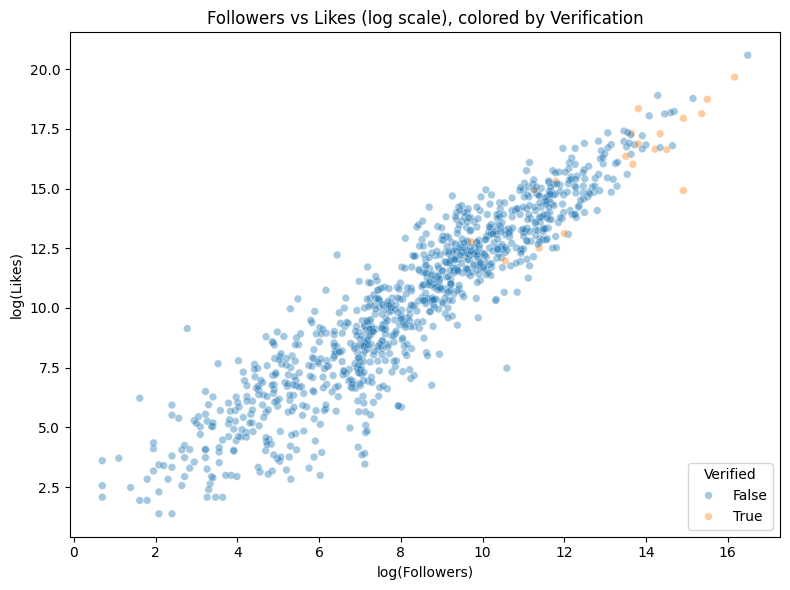

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

df_plot1 = df_tiktok.sample(n=5000, random_state=0) if len(df_tiktok) > 5000 else df_tiktok

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_plot1,
    x="followers_log",
    y="likes_log",
    hue="is_verified",
    alpha=0.4,
    s=30
)

plt.title("Followers vs Likes (log scale), colored by Verification")
plt.xlabel("log(Followers)")
plt.ylabel("log(Likes)")
plt.legend(title="Verified", loc="lower right")
plt.tight_layout()
plt.show()

## Text Mining

In [13]:
# Keep only rows with non-empty cleaned biography
df_text = df_tiktok.copy()
df_text = df_text[df_text["biography_clean"].astype(str).str.len() > 0].copy()

# keep only columns we will use later (ID, text, metrics)
cols_keep = ["account_id", "biography_clean", "followers", "likes", "videos_count", "followers_log", "likes_log", "videos_log", "likes_per_video", "follow_ratio"]

cols_keep = [c for c in cols_keep if c in df_text.columns]
df_text = df_text[cols_keep].copy()

df_text.head()

,account_id,biography_clean,followers,likes,videos_count,followers_log,likes_log,videos_log,likes_per_video,follow_ratio
0,a.r.m.y664,nazywam się basia 🇵🇱+🇺🇸 moja mama jest z usa 🖤...,1755,1586,20,7.470794,7.369601,3.044522,79.300000,1.215374
1,a2_9r,حسابي الاصلي تيكتككك(_8_ytp_,354,3843,225,5.872118,8.254269,5.420535,17.080000,0.248770
2,ti.po.check,активный пользователь тиктока 🌝 меня зовут bdr...,1960,24000,228,7.581210,10.085851,5.433722,105.263158,8.032787
3,nutrifersanort,"nutrióloga, educadora en diabetes.",43,100,5,3.784190,4.615121,1.791759,20.000000,1.023810
4,bhgdee,ig-bhg.dee📸 sc-dannieo2099 👻 fb- frank matthews✔️,276,126,4,5.624018,4.844187,1.609438,31.500000,0.121962


### Step 1: Build Bag-of-Words representation using TextVectorization


Using Bag-of-Words because it is the simplest and most interpretable text representation.

It transforms raw biographies into numerical features, where each column counts how often a token appears in a user's bio.

This is important because:

- Models and clustering require numeric inputs, not raw text.

- BoW highlights what topics creators choose to emphasize in their bios.

In [14]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

# take the cleaned bios as an array of strings
texts = df_text["biography_clean"].astype(str).values

# create a small tf.data Dataset for adapting the vectorizer
text_ds = tf.data.Dataset.from_tensor_slices(texts).batch(128)

# define the TextVectorization layer
vectorizer = TextVectorization(
    max_tokens=5000,                      # vocabulary size cap
    output_mode="count",                  # bag-of-words: term counts
    standardize="lower_and_strip_punctuation",  # lowercase + strip punctuation
    split="whitespace"                    # split on spaces
)

# learn the vocabulary from the corpus
vectorizer.adapt(text_ds)

# get the vocabulary and the bag-of-words matrix
vocab = np.array(vectorizer.get_vocabulary())           # index -> token
bow   = vectorizer(texts)                               # shape: (n_users, vocab_size)

# convert to numpy for easier manipulation
bow_np = bow.numpy()

print("Bag-of-Words shape:", bow.shape)

Bag-of-Words shape: (995, 4064)


**Interpretation**

The BoW matrix has shape (995 users * 4064 unique words).

This means:

We have 995 TikTok accounts.

Their combined biographies contain 4064 distinct tokens.

This gives us a foundation to analyze language usage patterns across the population.

### Step 2: Global word frequency across all bios


Counting how often each token appears across all bios allows us to understand platform-wide language patterns:

- Which topics dominate TikTok creator bios?

- What kinds of self-presentation are common?

It is descriptive analysis that reveals what creators choose to show publicly.

In [15]:
# total count of each token across all users
word_counts = bow_np.sum(axis=0)

word_freq = pd.DataFrame({"token": vocab,"count": word_counts})

# remove special tokens
word_freq = word_freq[~word_freq["token"].isin(["", "[UNK]"])]

# a small manual stopword list (you can extend if needed)
stopwords_basic = {
    "the","a","an","and","or","of","to","in","on","for","with","at",
    "i","im","me","my","you","your","we","our","us",
    "is","am","are","be","this","that"
}

word_freq = word_freq[~word_freq["token"].isin(stopwords_basic)]

# show top 20 most frequent tokens
word_freq.sort_values("count", ascending=False).head(20)


,token,count
3,ig,46
5,follow,39
10,love,29
11,instagram,29
12,insta,29
15,❤️,25
17,y,24
21,de,19
22,no,18
23,mom,17


/tmp/ipython-input-184918549.py:9: UserWarning: Glyph 128140 (\N{LOVE LETTER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128140 (\N{LOVE LETTER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


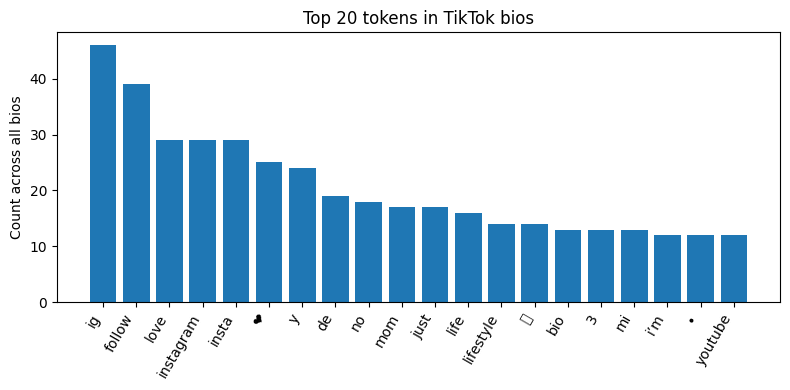

In [16]:
top_n = 20
top_words = word_freq.sort_values("count", ascending=False).head(top_n)

plt.figure(figsize=(8, 4))
plt.bar(top_words["token"], top_words["count"])
plt.xticks(rotation=60, ha="right")
plt.ylabel("Count across all bios")
plt.title(f"Top {top_n} tokens in TikTok bios")
plt.tight_layout()
plt.show()

**Interpretation**

- Cross-platform promotion dominates.

    Words like “ig”, “follow”, “instagram”, “insta” are the most frequent.

    Users mainly use their bio to promote Instagram or encourage others to follow them.

- Emotional terms are common.

    Tokens such as “love” and the ❤️ emoji appear often.

    Creators try to show friendliness or positive vibes to attract followers.

- Multiple languages appear.

    Words like “y”, “de”, “mi” suggest a notable Spanish-speaking population.

    The dataset includes diverse user communities, not only English speakers.

- Lifestyle / identity words are present but less dominant.

    Examples: “mom”, “life”, “lifestyle”.

    Some creators lightly describe themselves, but this is not the main trend.


### Step 3: TF-IDF

BoW over-weights extremely common words.

TF-IDF adjusts this by:

- Down-weighting universal terms.

- Up-weighting distinctive terms.

This helps identify meaningful vocabulary that differentiates creators.

In [17]:
#  - TF-IDF downweights extremely common words and upweights informative terms

from sklearn.feature_extraction.text import TfidfVectorizer

# Take biography text directly from df_text
corpus = df_text["biography_clean"].astype(str).values

tfidf = TfidfVectorizer(
    max_features = 5000,     # cap vocabulary size to avoid extreme sparsity
    min_df = 5,              # ignore rare tokens that appear <5 users
    max_df = 0.7,            # remove tokens appearing in >70% of users (too generic)
    stop_words = "english"   # remove common English stopwords
)

tfidf_matrix = tfidf.fit_transform(corpus)

print("TF-IDF matrix shape:", tfidf_matrix.shape)

TF-IDF matrix shape: (995, 87)


**Interpretation**
The TF-IDF matrix shape is:

(995 users * 87 distinctive tokens)

After filtering:

Rare words < 5 users -> removed

Words in > 70% bios -> removed

English stopwords -> removed

The remaining 87 tokens represent the meaningful vocabulary of TikTok bios.

This smaller, information-dense feature set becomes the basis for clustering.


### Step 4: Compare word usage between high-follower and low-follower accounts


This step connects text features to performance outcomes.

Instead of just counting words, we ask:

“What words do successful creators use, compared to unsuccessful ones?”

We split users by follower quartiles:

- Top 25% -> high influence

- Bottom 25% -> low influence

In [18]:
# use quartiles on followers to define high vs low groups
q1 = df_text["followers"].quantile(0.25)
q3 = df_text["followers"].quantile(0.75)

high_mask = df_text["followers"] >= q3
low_mask  = df_text["followers"] <= q1

# word counts within each group
high_counts = bow_np[high_mask.values].sum(axis=0)
low_counts  = bow_np[low_mask.values].sum(axis=0)

# convert to relative frequencies within each group
high_freq = high_counts / high_counts.sum()
low_freq  = low_counts  / low_counts.sum()

freq_compare = pd.DataFrame({
    "token": vocab,
    "high_freq": high_freq,
    "low_freq": low_freq
})

# clean out special tokens and basic stopwords
freq_compare = freq_compare[~freq_compare["token"].isin(["", "[UNK]"])]
freq_compare = freq_compare[~freq_compare["token"].isin(stopwords_basic)]

# difference: positive => more common among high-follower accounts
freq_compare["diff_high_low"] = freq_compare["high_freq"] - freq_compare["low_freq"]

# tokens over-represented in high-follower bios
top_high = freq_compare.sort_values("diff_high_low", ascending=False).head(20)

# tokens over-represented in low-follower bios
top_low = freq_compare.sort_values("diff_high_low", ascending=True).head(20)

top_high, top_low


(         token  high_freq  low_freq  diff_high_low
 3           ig   0.012318  0.004078       0.008240
 11   instagram   0.009518  0.002447       0.007071
 5       follow   0.009518  0.004078       0.005440
 10        love   0.005039  0.000000       0.005039
 21          de   0.005039  0.000816       0.004224
 12       insta   0.005599  0.001631       0.003968
 27           💌   0.003359  0.000000       0.003359
 34     youtube   0.003919  0.000816       0.003104
 98           📧   0.002800  0.000000       0.002800
 59          hi   0.003359  0.000816       0.002544
 68        snap   0.002240  0.000000       0.002240
 83         not   0.002240  0.000000       0.002240
 50          it   0.002240  0.000000       0.002240
 49        link   0.002240  0.000000       0.002240
 46          ⬇️   0.002240  0.000000       0.002240
 166    fitness   0.002240  0.000000       0.002240
 55           📍   0.002240  0.000000       0.002240
 62          20   0.002240  0.000000       0.002240
 24        j

From the comparison between high-follower and low-follower accounts, we see clear differences in the words used in TikTok bios:

- **High-follower accounts** use more *promotional and contact* language.  
  Tokens like **"ig"**, **"instagram"**, **"insta"**, **"follow"**, **"youtube"**, **"link"**, **"📧"**, **"⬇️"**, and **"💌"** are all more frequent in bios of users with many followers.  
  -> These creators actively drive traffic to other platforms and make it easy for people (or brands) to contact them.

- High-follower bios also contain more **positive / lifestyle words**, such as **"love"**, **"hi"**, **"fitness"**, and **"just"**.  
  -> This suggests a friendly, aspirational tone that fits influencer-style personal branding.

- **Low-follower accounts**, on the other hand, use more **self-referential or “random” words** such as **"bio"**, **"mi"**, **"y"**, **"no"**, **"yet"**, and **"random"**, plus various filler symbols and non-English function words.  
  -> These bios often describe the person about themselves, but they do not clearly ask viewers to follow or connect.

**Conclusion:**

Successful creators craft bios with:

- Brand consistency

- External platform promotions

- Explicit calls to action

- Contact points

Low-engagement bios appear more personal, fragmented, and unstructured.

This is associative, not causal. We only compare patterns, not prove causes.

### Step 5: KMeans Clustering

Instead of analyzing words individually, clustering groups users with similar semantic patterns:

- Detect communities

- Recognize lifestyle or persona types

- Build audience segment taxonomy

Do unsupervised segmentation, where the model discovers groups without labels.

In [19]:
from sklearn.cluster import KMeans

# tune k = number of clusters based on business logic
k = 4
kmeans = KMeans(
    n_clusters=k,
    random_state=42,  # ensures reproducibility
    n_init=10         # recommended to stabilize centroids
)

df_text["cluster"] = kmeans.fit_predict(tfidf_matrix)
df_text["cluster"].value_counts()

,count
cluster,
0,868
1,70
3,51
2,6


**Interpretation**

Four clusters emerge naturally.

Each group represents a unique linguistic persona.

This step changes the analysis from:

“What words do users use?” to “What types of users exist on TikTok?”

This unlocks strategic insights for:

- Marketing segmentation

- Creator partnerships

- Audience analytics

### Step 6: Interpret cluster vocabulary

KMeans outputs only numbers (0,1,2,3).

To understand what each group means in real life:

- Compute the average TF-IDF vector per cluster

- Select the top weighted tokens

- Assign a persona identity

In [20]:
# Identify top representative words per cluster
# We compute the mean TF-IDF weight within each cluster
# Words with highest average TF-IDF = most characteristic

feature_names = np.array(tfidf.get_feature_names_out())

def get_top_words_per_cluster(matrix, labels, feature_names, top_n=15):
    results = {}

    labels = np.array(labels)

    for c in np.unique(labels):
        idx = (labels == c)
        mean_vec = matrix[idx].mean(axis=0).A1
        top_idx = mean_vec.argsort()[::-1][:top_n]
        results[c] = feature_names[top_idx]
    return results

cluster_words = get_top_words_per_cluster(tfidf_matrix, df_text["cluster"], feature_names)
cluster_words

{np.int32(0): array(['insta', 'instagram', 'follow', 'love', 'fb', 'bio', 'just', 'من',
        'لا', 'youtube', 'new', 'mom', 'en', 'link', 'snap'], dtype=object),
 np.int32(1): array(['com', 'gmail', 'contact', 'ig', 'mom', 'life', 'collabs',
        'fashion', 'insta', 'love', 'lifestyle', 'artist', 'business',
        'nyc', 'hi'], dtype=object),
 np.int32(2): array(['22', 'te', 'love', 'по', 'на', 'لا', 'من', 'youtube', 'welcome',
        'tx', 'una', 'twitch', 'tv', 'tiktok', 'taken'], dtype=object),
 np.int32(3): array(['ig', 'fb', 'follow', 'com', 'ceo', 'en', 'snapchat', 'random',
        'una', 'yt', 'content', 'te', 'lifestyle', 'life', 'love'],
       dtype=object)}

**Interpretation**

**Cluster 0 — Cross-Platform Promoters**

Top words:

“insta”, “instagram”, “follow”, “youtube”, “link”, “snap”

Behavior:

- Active cross-platform marketing

- Direct follower funneling

- Content awareness

**Cluster 1 — Influencer / Business Creators**

Top words:

“gmail”, “collabs”, “artist”, “business”, “fashion”, “nyc”

Behavior:

- Commercial intent

- Collab requests, email contacts

- Fashion / lifestyle identity

- Urban branding

**Cluster 2 — Casual Multilingual / Hobby Accounts**

Top words:

“tx”, “welcome”, “twitch”, “tv”, “tiktok”, “22”, “по”, “لا”

Behavior:

- Personal, non-professional

- Multi-language fragments

- Gaming or casual interests

- Low branding focus

**Cluster 3 — Personal Branding + Content Identity**

Top words:

“ceo”, “content”, “lifestyle”, “life”, “yt”, “snapchat”

Behavior:

- Aspirational identities (“ceo”)

- Consistent lifestyle messaging

- Positioning self as creator brand

### Step 7: Compare engagement metrics across clusters

To make it meaningful for business, we must connect persona type to performance.

We compare per-cluster averages:

- Followers

- Likes

- Videos posted

- Likes per video

- Follow ratio

This answers:

“Which biography strategy performs better?”

In [21]:
# Helps us understand which creator persona performs better

df_text.groupby("cluster")[
    ["followers", "likes", "videos_count",
     "likes_per_video","follow_ratio"]
].mean().round(2)

,followers,likes,videos_count,likes_per_video,follow_ratio
cluster,,,,,
0,94776.78,2872596.24,256.92,6500.01,4975.77
1,306182.26,10120001.01,505.54,21669.03,3152.22
2,15359.33,350994.33,82.33,10211.93,164.97
3,123406.10,3231928.37,242.41,16525.06,5077.30


**Interpretation**

- **Cluster 0 — Cross-platform Promoters**

    - Medium followers, strong engagement (likes_per_video high).

    - Bios dominated by CTA words like insta, follow, youtube, link.

    Direct promotion works：clear calls-to-action drive user interaction.

- **Cluster 1 — Influencer / Business Creators**

    - Highest followers + highest likes overall.

    - Bios show business intent：gmail, collabs, artist, business.
    
    Professional positioning attracts brands & stable audience growth.

- **Cluster 2 — Casual / Multilingual Hobby Accounts**

    - Low followers + Low likes.

    - Bios are personal, fragmented：tx, welcome, twitch, una.
    
    Weak branding -> low discoverability & low engagement.

- **Cluster 3 — Lifestyle / Content Identity**

    - Mid followers, highest like_per_video among clusters.

    - Bios highlight identity：ceo, content, lifestyle.
    
    Aspirational branding appeals to niche audiences, less emphasis on promotion.

Creators who treat their bio as a marketing asset (promotion or business contact) consistently outperform those who use bios as a casual self-description.

# Model 2: Logistics Regression
**Reasons for choosing Logistic Regression:**\
Which variables significantly enhance engagement with the highest interpretability? (Interpretable)\
Coefficient and Odds Ratio directly provide insights into the causal direction (positive/negative).

### Step1 - Define the rediction goal

In [22]:
# Target:nHigh follower (Top 25% = 1, bottom 75% = 0)
df_text["is_high_follower"] = (df_text["followers"] >= q3).astype(int)
# Check distribution
print("Target distribution:")
print(df_text["is_high_follower"].value_counts(normalize=True))

Target distribution:
is_high_follower
0    0.749749
1    0.250251
Name: proportion, dtype: float64


### Step 2 - Select feature sex X

In [23]:
print("=== Building Feature Matrix ===")

# 1. TF-IDF features (already defined)
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=tfidf.get_feature_names_out(),
    index=df_text.index)
print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")

# 2. Numeric features (check if already calculated)
if 'likes_per_video' not in df_text.columns:
    df_text["likes_per_video"] = df_text["likes"] / df_text["videos_count"]

if 'follow_ratio' not in df_text.columns:
    df_text["follow_ratio"] = df_text["followers"] / (df_text["following"] + 1)

# Create numeric features DataFrame
numeric_features = pd.DataFrame({
    "likes": df_text["likes"],
    "videos_count": df_text["videos_count"],
    "follow_ratio": df_text["follow_ratio"],
    "likes_per_video": df_text["likes_per_video"]
})

# 3. Bio text features
df_text["bio_length"] = df_text["biography_clean"].str.len()

import re
df_text["num_emojis"] = df_text["biography_clean"].apply(
    lambda x: sum(1 for c in x if ord(c) > 127)  # Simple emoji detection
)

numeric_features["bio_length"] = df_text["bio_length"]
numeric_features["num_emojis"] = df_text["num_emojis"]

print(f"Numeric features: {numeric_features.shape}")

# 4. Cluster features (already defined)
print(f"Number of clusters: {df_text['cluster'].nunique()}")
cluster_dummies = pd.get_dummies(df_text["cluster"], prefix="cluster")

# 5. Combine all features
X = pd.concat([
    numeric_features,
    tfidf_df,
    cluster_dummies
], axis=1)

y = df_text["is_high_follower"]

print(f"Final feature matrix shape: X={X.shape}, y={y.shape}")
print(f"Number of features: {len(X.columns)}")
print()

=== Building Feature Matrix ===
TF-IDF matrix shape: (995, 87)
Numeric features: (995, 6)
Number of clusters: 4
Final feature matrix shape: X=(995, 97), y=(995,)
Number of features: 97



We combined:

Numeric metrics (likes, videos, follow ratio, etc.)

TF-IDF text features

Cluster membership

Bio features (length, emojis)

Interpretation:\
➡ The model uses both what creators write and how their profiles behave to predict success.\
➡ TF-IDF captures key words; numeric features capture engagement behavior(likes, videos, follow ratio, etc); clusters capture persona type.

### Step3 - Train-test split

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")
print(f"Positive ratio in training: {y_train.mean():.3f}")
print(f"Positive ratio in test: {y_test.mean():.3f}")
print()

Training set: (796, 97), Test set: (199, 97)
Positive ratio in training: 0.250
Positive ratio in test: 0.251



### Step4 - Standardized numeric features

In [25]:
from sklearn.preprocessing import StandardScaler

# Identify columns to scale (numeric features only)
numeric_cols = numeric_features.columns.tolist()
tfidf_cols = tfidf.get_feature_names_out().tolist()

print(f"Numeric columns to scale: {numeric_cols}")
print(f"TF-IDF columns (not scaled): {len(tfidf_cols)} features")
print(f"Cluster dummies (not scaled): {len(cluster_dummies.columns)} features")

# Scale only numeric features
scaler = StandardScaler()

# Create copies to avoid modifying originals
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Scale numeric columns
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("✓ Numeric features scaled successfully")
print("✓ TF-IDF and cluster features kept as-is")
print()

Numeric columns to scale: ['likes', 'videos_count', 'follow_ratio', 'likes_per_video', 'bio_length', 'num_emojis']
TF-IDF columns (not scaled): 87 features
Cluster dummies (not scaled): 4 features
✓ Numeric features scaled successfully
✓ TF-IDF and cluster features kept as-is



### Step 5 — Fit Logistic Regression Model

In [26]:
from sklearn.linear_model import LogisticRegression
X_train_scaled.columns = X_train_scaled.columns.astype(str)
X_test_scaled.columns = X_test_scaled.columns.astype(str)

# Initialize logistic regression with L2 regularization
logreg = LogisticRegression(
    penalty='l2',           # L2 regularization (Ridge)
    C=1.0,                  # Inverse regularization strength
    solver='lbfgs',         # Good for medium datasets
    max_iter=1000,          # Ensure convergence
    random_state=42,        # Reproducibility
    class_weight='balanced' # Handle class imbalance
)

# Train the model
logreg.fit(X_train_scaled, y_train)

print("✓ Logistic Regression model trained successfully")
print(f"Number of iterations: {logreg.n_iter_[0]}")
print()

✓ Logistic Regression model trained successfully
Number of iterations: 29



### Step 6 - Evaluate model performance

=== Model Performance ===
Accuracy: 0.8342
ROC-AUC: 0.8979
Precision: 0.6667
Recall: 0.6800
F1-Score: 0.6733

Confusion Matrix:
[[132  17]
 [ 16  34]]

True Negatives: 132
False Positives: 17
False Negatives: 16
True Positives: 34

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       149
           1       0.67      0.68      0.67        50

    accuracy                           0.83       199
   macro avg       0.78      0.78      0.78       199
weighted avg       0.84      0.83      0.83       199



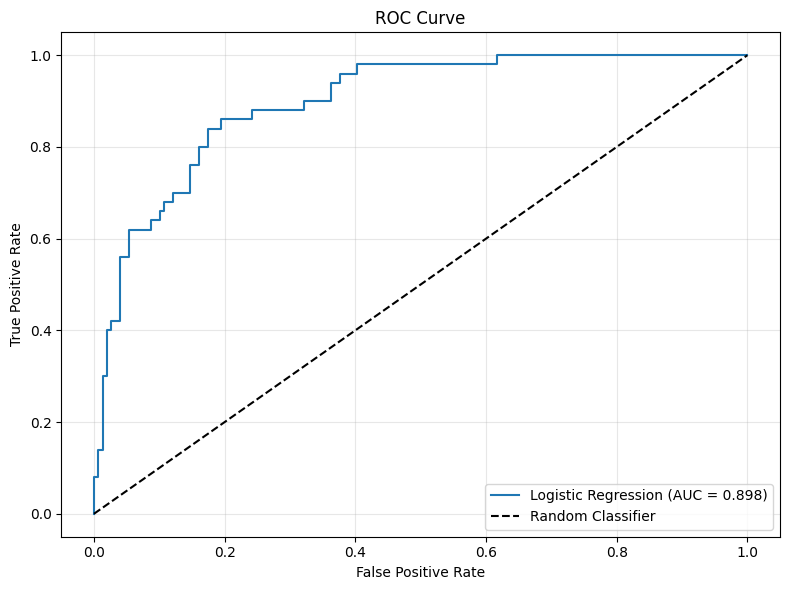

In [27]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

# Make predictions
y_pred = logreg.predict(X_test_scaled)
y_pred_proba = logreg.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("=== Model Performance ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

print("\nConfusion Matrix:")
print(conf_matrix)
print(f"\nTrue Negatives: {conf_matrix[0,0]}")
print(f"False Positives: {conf_matrix[0,1]}")
print(f"False Negatives: {conf_matrix[1,0]}")
print(f"True Positives: {conf_matrix[1,1]}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Additional: Plot ROC Curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Interpretation:\
➡ Overall performance is strong for an observational social-media dataset.\
➡ High ROC-AUC (0.898) means the model is very good at ranking creators from low → high potential.\

### Step 7  - Interpret coefficient

=== Top 20 Most Influential Features ===
        feature  coefficient  abs_coefficient
          likes     3.527237         3.527237
likes_per_video     2.735455         2.735455
   follow_ratio     2.265441         2.265441
            fun     1.420362         1.420362
         twitch    -1.206045         1.206045
           just     1.112629         1.112629
            god     1.085630         1.085630
          taken    -1.079869         1.079869
   videos_count     1.078037         1.078037
             18    -1.053809         1.053809
           link     1.036975         1.036975
           love    -0.907326         0.907326
           life     0.858820         0.858820
            ceo     0.845161         0.845161
             mi    -0.834273         0.834273
           shop    -0.809210         0.809210
       facebook    -0.800179         0.800179
            los     0.787890         0.787890
             24     0.771540         0.771540
          based     0.762195         0.

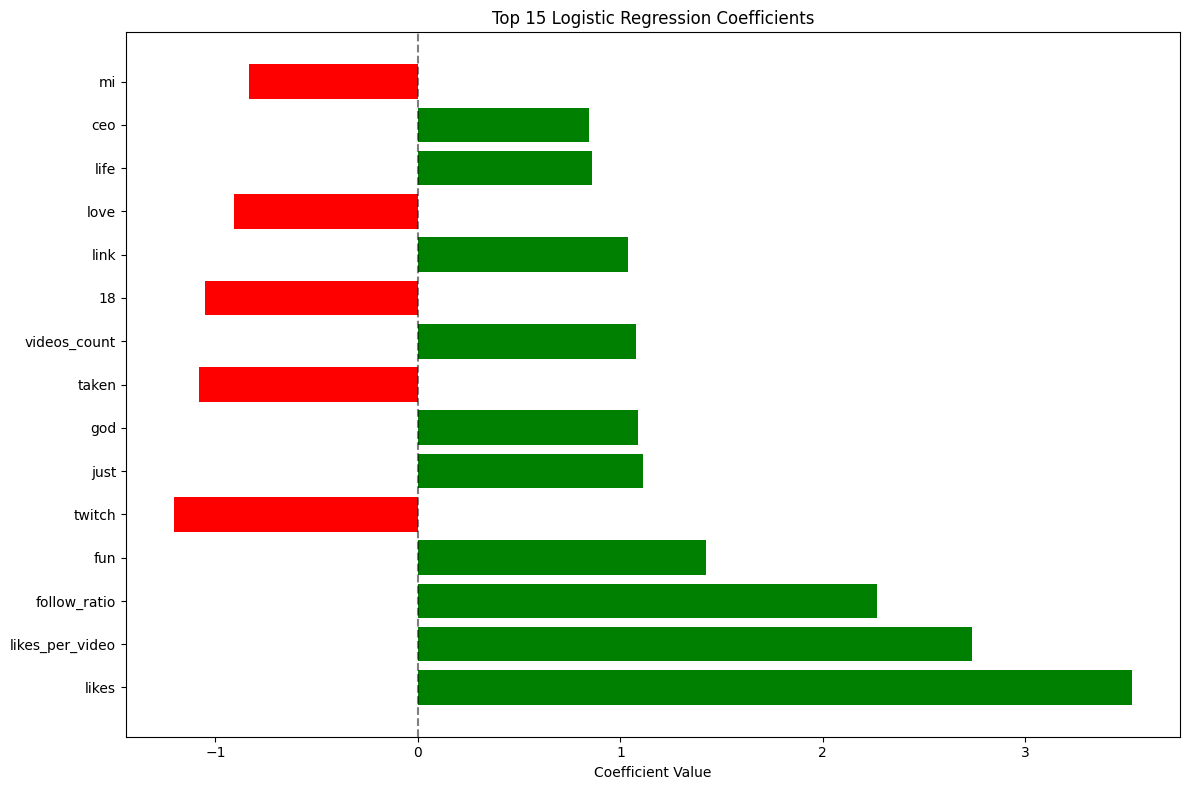

In [28]:
# Create DataFrame of coefficients
coefficients = pd.DataFrame({
    "feature": X.columns,
    "coefficient": logreg.coef_[0],
    "abs_coefficient": np.abs(logreg.coef_[0])
})

# Sort by absolute value (most influential)
coefficients_sorted = coefficients.sort_values("abs_coefficient", ascending=False)

print("=== Top 20 Most Influential Features ===")
print(coefficients_sorted.head(20).to_string(index=False))

print("\n=== Interpretation ===")
print("• Positive coefficients → Increase probability of being high-follower")
print("• Negative coefficients → Decrease probability of being high-follower")

print("\n=== Feature Type Analysis ===")

# Top numeric features
numeric_coeffs = coefficients[coefficients["feature"].isin(numeric_cols)]
print("\nTop numeric features:")
print(numeric_coeffs.sort_values("abs_coefficient", ascending=False).head(10).to_string(index=False))

# Top TF-IDF features (words)
tfidf_coeffs = coefficients[coefficients["feature"].isin(tfidf_cols)]
print("\nTop TF-IDF features (words):")
print(tfidf_coeffs.sort_values("abs_coefficient", ascending=False).head(15).to_string(index=False))

# Cluster effects
cluster_coeffs = coefficients[coefficients["feature"].str.startswith('cluster_')]
print("\nCluster effects:")
print(cluster_coeffs.sort_values("coefficient", ascending=False).to_string(index=False))

# Visualize top coefficients
plt.figure(figsize=(12, 8))
top_n = 15
top_coeffs = coefficients_sorted.head(top_n)

colors = ['green' if x > 0 else 'red' for x in top_coeffs["coefficient"]]
bars = plt.barh(range(len(top_coeffs)), top_coeffs["coefficient"], color=colors)
plt.yticks(range(len(top_coeffs)), top_coeffs["feature"])
plt.xlabel("Coefficient Value")
plt.title(f"Top {top_n} Logistic Regression Coefficients")
plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Model3: Random Forest

In [29]:
print("=== Model 3: Random Forest Classifier ===")

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Initialize RF model
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    class_weight="balanced"   # handle class imbalance (25% positive)
)
rf_model.fit(X_train, y_train)

print("✓ Random Forest model trained successfully")

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluation
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_auc = roc_auc_score(y_test, y_prob_rf)

print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Random Forest ROC-AUC: {rf_auc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Feature importance
importances = rf_model.feature_importances_
rf_importance_df = (
    pd.DataFrame({"feature": X_train.columns, "importance": importances})
    .sort_values(by="importance", ascending=False)
)

print("\nTop 15 Most Important Features in Random Forest:")
print(rf_importance_df.head(15))


=== Model 3: Random Forest Classifier ===
✓ Random Forest model trained successfully
Random Forest Accuracy: 0.9045
Random Forest ROC-AUC: 0.9763

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       149
           1       0.90      0.70      0.79        50

    accuracy                           0.90       199
   macro avg       0.90      0.84      0.86       199
weighted avg       0.90      0.90      0.90       199


Top 15 Most Important Features in Random Forest:
            feature  importance
0             likes    0.296008
2      follow_ratio    0.225369
3   likes_per_video    0.145770
1      videos_count    0.102846
4        bio_length    0.052339
5        num_emojis    0.024777
93        cluster_0    0.011062
26              com    0.007791
51               ig    0.006929
54             just    0.006435
56             life    0.005986
62             love    0.005127
43            gmail    0.004973
94   

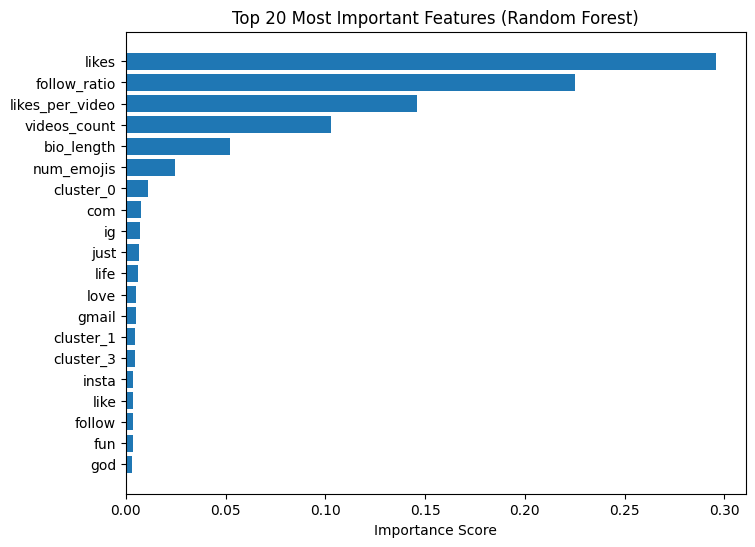

In [30]:
import matplotlib.pyplot as plt

top_k = 20
top_features = rf_importance_df.head(top_k)

plt.figure(figsize=(8, 6))
plt.barh(top_features["feature"], top_features["importance"])
plt.gca().invert_yaxis()
plt.title("Top 20 Most Important Features (Random Forest)")
plt.xlabel("Importance Score")
plt.show()


# Model 4: Gradient Boosting

In [31]:
# Model 4: Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Initialize the Gradient Boosting classifier
gb_model = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

# Train the model
gb_model.fit(X_train, y_train)

# Generate predictions
y_pred_gb = gb_model.predict(X_test)
y_prob_gb = gb_model.predict_proba(X_test)[:, 1]

# Evaluate model performance
gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_auc = roc_auc_score(y_test, y_prob_gb)

print("=== Gradient Boosting Performance ===")
print(f"Accuracy: {gb_accuracy:.4f}")
print(f"ROC-AUC:  {gb_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb))


=== Gradient Boosting Performance ===
Accuracy: 0.9095
ROC-AUC:  0.9761

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       149
           1       0.88      0.74      0.80        50

    accuracy                           0.91       199
   macro avg       0.90      0.85      0.87       199
weighted avg       0.91      0.91      0.91       199



In [32]:
import pandas as pd

# Extract and rank feature importance scores
gb_importance = pd.DataFrame({
    "feature": X_train.columns,
    "importance": gb_model.feature_importances_
}).sort_values(by="importance", ascending=False)

print("\nTop 15 Important Features (Gradient Boosting):")
print(gb_importance.head(15))



Top 15 Important Features (Gradient Boosting):
            feature  importance
0             likes    0.724051
2      follow_ratio    0.100714
1      videos_count    0.037014
56             life    0.016634
3   likes_per_video    0.013581
44              god    0.009414
4        bio_length    0.008837
14               21    0.006879
5        num_emojis    0.006541
54             just    0.006283
66              nyc    0.006246
67           online    0.004704
51               ig    0.004530
64              mom    0.004477
58             like    0.003660


# Model 5: XGBoosting

In [33]:
# Model 5: XGBoost Classifier

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(
    n_estimators=500,        # Number of boosting rounds
    max_depth=4,             # Maximum tree depth
    learning_rate=0.05,      # Step size shrinkage
    subsample=0.8,           # Row sampling
    colsample_bytree=0.8,    # Feature sampling
    objective="binary:logistic",
    eval_metric="auc",
    random_state=42
)

# Train the model (use unscaled features)
xgb_model.fit(X_train, y_train)

# Generate predictions
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate model performance
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_auc = roc_auc_score(y_test, y_prob_xgb)

print("=== XGBoost Performance ===")
print(f"Accuracy: {xgb_accuracy:.4f}")
print(f"ROC-AUC:  {xgb_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))


=== XGBoost Performance ===
Accuracy: 0.9296
ROC-AUC:  0.9835

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       149
           1       0.95      0.76      0.84        50

    accuracy                           0.93       199
   macro avg       0.94      0.87      0.90       199
weighted avg       0.93      0.93      0.93       199



In [34]:
import pandas as pd

# Extract and rank feature importance scores
xgb_importance = pd.DataFrame({
    "feature": X_train.columns,
    "importance": xgb_model.feature_importances_
}).sort_values(by="importance", ascending=False)

print("\nTop 15 Important Features (XGBoost):")
print(xgb_importance.head(15))



Top 15 Important Features (XGBoost):
            feature  importance
0             likes    0.253713
56             life    0.089360
2      follow_ratio    0.081737
62             love    0.058335
58             like    0.056643
52            insta    0.043760
3   likes_per_video    0.042293
93        cluster_0    0.040325
39               fb    0.036952
1      videos_count    0.036816
26              com    0.036043
51               ig    0.034484
40           follow    0.034104
4        bio_length    0.030369
64              mom    0.029199


# Model Selection Rationale

After establishing linear and bagging-based baselines, we further introduce Gradient Boosting and XGBoost to enhance the modeling framework.
The motivation for choosing these two models is that both belong to the boosting family, which is designed to iteratively correct the errors made by previous learners and therefore reduce model bias. This makes boosting particularly suitable for our setting, where the feature space is high-dimensional and heterogeneous, combining numerical engagement metrics, textual TF-IDF features, and cluster indicators.

Gradient Boosting serves as a classical and interpretable boosting benchmark, while XGBoost represents a more advanced and regularized boosting implementation that is widely adopted in practice due to its strong generalization performance. By including both models, we are able to assess whether performance gains are consistent across different boosting strategies and whether additional regularization and optimization mechanisms lead to further improvements.

# Model Performance Comparison

The Gradient Boosting model achieves strong predictive performance, with an accuracy of 0.91 and a ROC–AUC of 0.976. The classification report shows balanced behavior across classes, with particularly good recall for high-follower accounts (recall = 0.74), indicating that the model is effective at identifying successful creators. Feature importance analysis reveals that engagement-related variables such as likes, follow_ratio, and videos_count dominate the decision process, while textual and profile features (e.g., life, bio_length, num_emojis) provide complementary signals.

The XGBoost model further improves upon this performance, achieving an accuracy of 0.93 and a ROC–AUC of 0.984, which is the highest among all evaluated models. Compared to Gradient Boosting, XGBoost demonstrates stronger discrimination power while maintaining robust recall for high-follower accounts (recall = 0.76). Its feature importance ranking highlights a more diverse set of influential variables, including engagement metrics (likes, follow_ratio), textual features (life, love, insta, follow), and cluster membership, suggesting that XGBoost is better able to capture complex non-linear interactions between behavioral and semantic characteristics.
